In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_train = pd.read_csv('train_data.csv')

In [12]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [26]:
df_train['Admission_Deposit'].var()

np.float64(1181082.6254793175)

In [23]:
df_train['Hospital_type_code'].unique().shape[0]

7

In [15]:
df_train['case_id'].sort_values()

0              1
1              2
2              3
3              4
4              5
           ...  
318433    318434
318434    318435
318435    318436
318436    318437
318437    318438
Name: case_id, Length: 318438, dtype: int64

In [28]:
from seaborn import countplot, kdeplot
from tqdm import tqdm

def plot_dists(df: pd.DataFrame):

    categorical_limit = 18 # this is a totally arbritray number

    col_names = df.columns

    for col_name in tqdm(col_names):
    
        # fig, ax = plt.subplots()

        col = df[col_name]
        fig, ax = plt.subplots(figsize=(15, 10))
        
        print(col_name)

        # check to see if data is categorical

        # if col_name in ['Stay, Age']:
        #     x=col.sort_values()
        # else:
        #     x=col
        
        if col.unique().shape[0] < 50:
            countplot(ax=ax, x=col.sort_values(), data=df, palette='rocket', align='edge', width=0.3, hue=col.sort_values(), legend=False)
        else:
            kdeplot(ax=ax, x=col, data=df)

    # if column[0].unique().shape[0] < 50: # if <50, assume categorical
        
    #     countplot(ax=ax, x=column.sort_values(), data=column)

<Axes: xlabel='Admission_Deposit', ylabel='Density'>

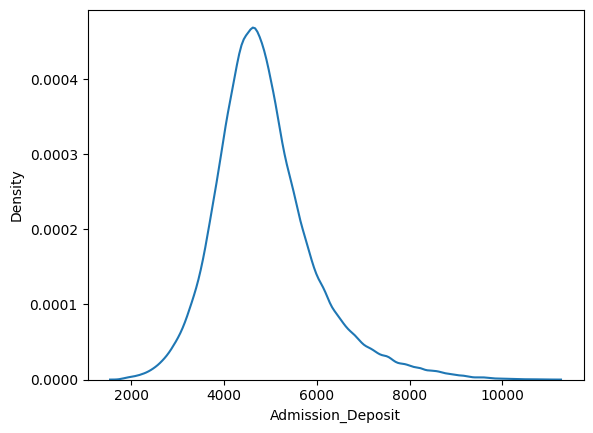

In [27]:
kdeplot(x=df_train['Admission_Deposit'], data=df_train)

In [ ]:
plot_dists(df_train.drop(['case_id', 'patientid'], axis=1))

There is high cardinality in categorical variables. Paiwise correlation needs to be assesed to try and trim predictors before 1 hot encoding


In [31]:
categorical_columns = [
    'Hospital_code',
    'Hospital_type_code', 
    'City_Code_Hospital',
    'Hospital_region_code', 
    'Department', 
    'Ward_Type', 
    'Ward_Facility_Code', 
    'Bed Grade',
    'City_Code_Patient', 
    'Type of Admission',
    'Severity of Illness', 
    ]

In [88]:
from scipy.stats import chisquare

df_train_cat = df_train[categorical_columns].apply(lambda x : pd.factorize(x)[0])+1

df_train_cat

# def cs(f_obs, f_exp):
#     return chisquare(f_obs, np.sum(f_obs)/np.sum(f_exp) * f_exp, axis=1)



pd.DataFrame([chisquare(f_obs=df_train_cat[x].values, f_exp=df_train_cat.values.T, axis=1)[0] for x in df_train_cat])




ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
[0.         3.15975223 1.89188453 5.45966295 4.11002463 6.14678561
 4.16164572 6.21667696 1.73992817 6.92669909 5.75649563]

In [86]:
df=pd.DataFrame({'a':['a','a','c'],'c':['a','a','c'],'d':['a','b','c']})
df

,a,c,d
0,a,a,a
1,a,a,b
2,c,c,c


In [87]:
df=df.apply(lambda x : pd.factorize(x)[0])+1
df

print(df.values.T)

pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])


[[1 1 2]
 [1 1 2]
 [1 2 3]]


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
[0.  0.  0.5]

In [70]:
print(df['a'].values)

print(df.values.T)

[1 2 3]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
